In [54]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

['Run_0_CONC.txt' 'Run_10_CONC.txt' 'Run_11_CONC.txt' 'Run_12_CONC.txt'
 'Run_13_CONC.txt' 'Run_14_CONC.txt' 'Run_15_CONC.txt' 'Run_16_CONC.txt'
 'Run_17_CONC.txt' 'Run_18_CONC.txt' 'Run_19_CONC.txt' 'Run_1_CONC.txt'
 'Run_20_CONC.txt' 'Run_21_CONC.txt' 'Run_22_CONC.txt' 'Run_23_CONC.txt'
 'Run_24_CONC.txt' 'Run_25_CONC.txt' 'Run_26_CONC.txt' 'Run_27_CONC.txt'
 'Run_2_CONC.txt' 'Run_3_CONC.txt' 'Run_4_CONC.txt' 'Run_5_CONC.txt'
 'Run_6_CONC.txt' 'Run_7_CONC.txt' 'Run_8_CONC.txt' 'Run_9_CONC.txt']


<IPython.core.display.Javascript object>


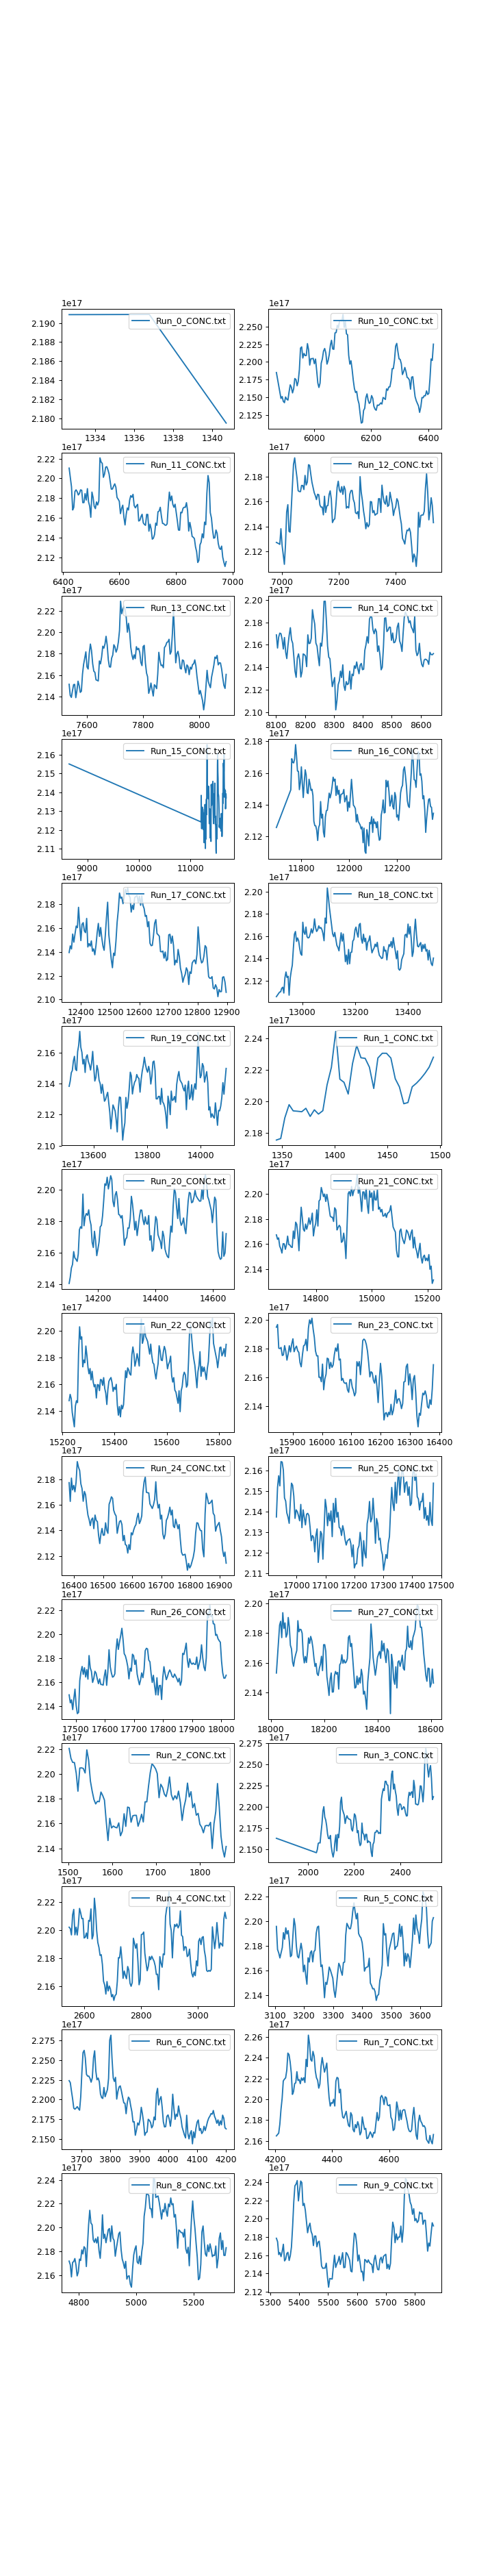

In [57]:
Data_DIR = os.getcwd()+"\\Sample Data\\"#Data Directory - change accordingly

#Save File info
Save_df = pd.DataFrame(columns=['File','Time','N','AVG_Data','SDEV','SEM'])
Save_file = "AVG_Data.txt"

#Input file info
file_suff = "_CONC.txt" #Suffix of data file


#index of data to strip (if anamolous data)
idx_st = 0
idx_end_init = 0 #set this to < 1 to use end of file


#find all files with "file_suff" end
filelist=[]
for file in os.listdir(Data_DIR):
    if file.endswith(file_suff):
        filelist = np.append(filelist, str(file))
        
#set up plot...
%matplotlib notebook
plot_col = 2
plot_row = int((len(filelist)+plot_col//2)//plot_col)
f, axarr = plt.subplots(plot_row,plot_col, figsize=((plot_col*4),(plot_row*3)))
axarr = axarr.ravel()

for idx, item in enumerate(filelist): #loop through filelist
    
    #import data
    import_df = pd.read_csv(Data_DIR+item,sep='\t',header=None,names=['Time','Data'])
            
    #Trim Data
    if idx_end_init < 1:
        idx_end = len(import_df['Time'])
    elif idx_end_init > len(import_df['Time']):
        idx_end = len(import_df['Time'])
    else: idx_end = idx_end_init
    import_df = import_df[idx_st:idx_end]
    
    import_df['Time'] = import_df['Time']-import_df['Time'][0]
    
    #prep plots
    axarr[idx].plot(import_df['Time'], import_df['Data'], label = str(item))
    axarr[idx].legend(loc="upper right")
    
    Data_AVG = import_df['Data'].mean()
    Data_Stdev = import_df['Data'].std()
    Data_SEM = import_df['Data'].sem()
    Data_Time = import_df['Time'].max()
    Data_N = len(import_df['Time'])
    
    Save_df.loc[idx] = [item,Data_Time,Data_N,Data_AVG,Data_Stdev,Data_SEM]
    

plt.savefig(Data_DIR+"Time_Plots.png")
#plt.show()

Save_df.to_csv(Data_DIR+Save_file,index=False,sep='\t')
#Save_df.head()

    